# Task 3: Heart Disease Prediction using ML Classification

In [20]:
# Dataset: Heart Disease UCI

# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier

# Show plots inline
%matplotlib inline


## Loading The Dataset

In [21]:
# Load dataset
df = pd.read_csv("heart.csv")   # Change path if needed

# Preview dataset
print(df.head())

# Basic info
print("\nDataset Info:")
print(df.info())

# Check missing values
print("\nMissing Values:")
print(df.isnull().sum())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-n

## Exploratory Data Analysis (EDA)

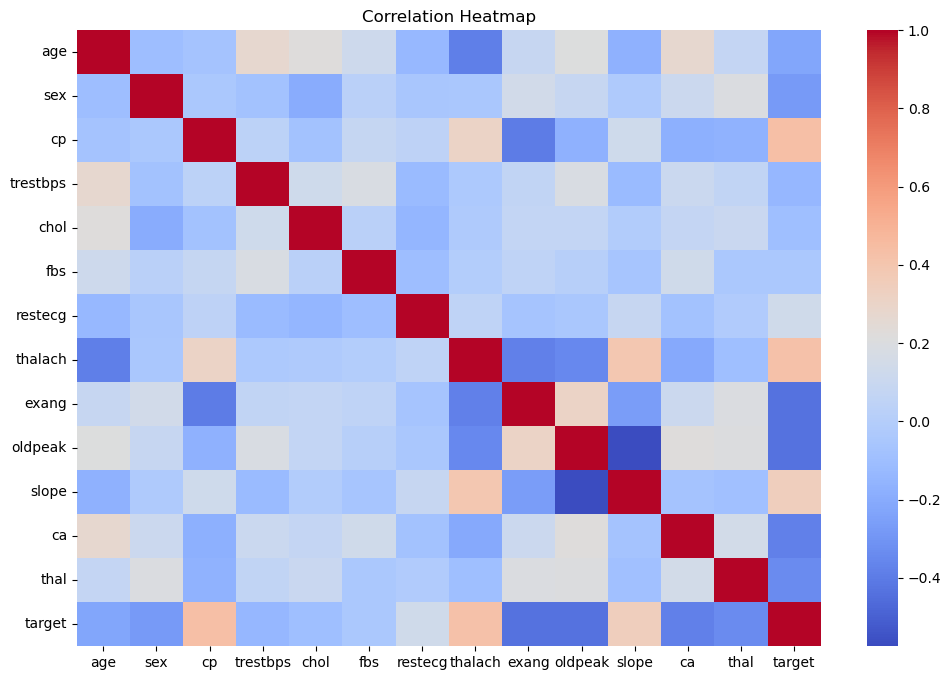

In [22]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


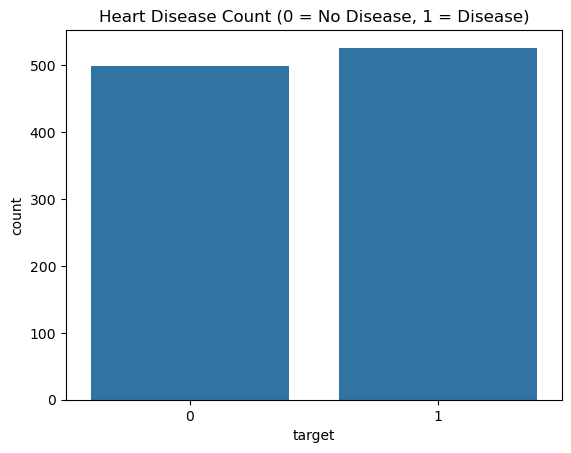

In [23]:
sns.countplot(data=df, x="target")
plt.title("Heart Disease Count (0 = No Disease, 1 = Disease)")
plt.show()


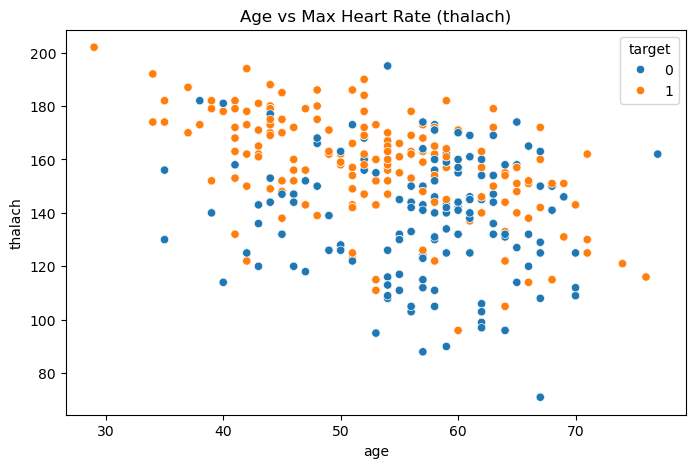

In [24]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="age", y="thalach", hue="target")
plt.title("Age vs Max Heart Rate (thalach)")
plt.show()


## Data Preprocessing

In [25]:
# Define features & target
X = df.drop("target", axis=1)
y = df["target"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Training (Decision Tree)

In [26]:
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)

tree_pred = tree_model.predict(X_test)

tree_acc = accuracy_score(y_test, tree_pred)

print("Decision Tree Accuracy:", tree_acc)


Decision Tree Accuracy: 0.8249027237354085


## Model Evaluation

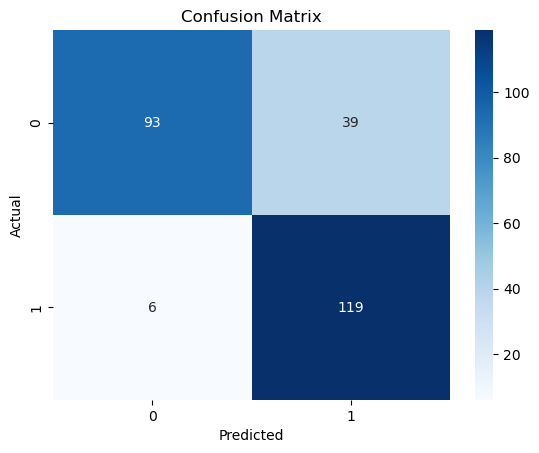

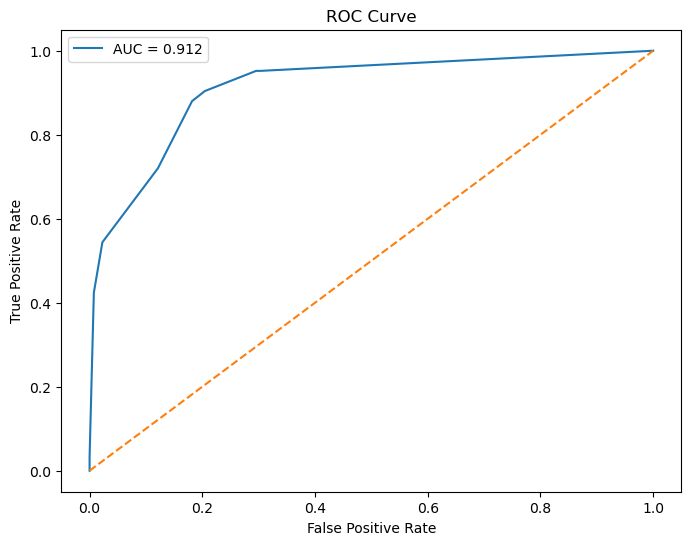

ROC-AUC Score: 0.911878787878788


In [32]:

# Confusion Matrix
cm = confusion_matrix(y_test, best_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve & AUC Score
# Probability scores
y_prob = tree_model.predict_proba(X_test)[:,1]

# Compute ROC metrics
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

print("ROC-AUC Score:", auc)

## Feature Importance

In [33]:
importance = best_model.feature_importances_
feature_importance = pd.DataFrame({"Feature": X.columns, "Importance": importance}).sort_values(by="Importance", ascending=False)
print("\nFeature Importance (Decision Tree):")
print(feature_importance)



Feature Importance (Decision Tree):
     Feature  Importance
2         cp    0.346386
12      thal    0.196668
11        ca    0.144580
9    oldpeak    0.089680
7    thalach    0.049450
4       chol    0.048121
10     slope    0.044426
0        age    0.031690
3   trestbps    0.027755
8      exang    0.021244
1        sex    0.000000
5        fbs    0.000000
6    restecg    0.000000


# Ealuatioan

This project involved the development of a supervised machine learning model to predict the presence of heart disease using the UCI dataset. The workflow encompassed comprehensive data preprocessing, including the use of StandardScaler for feature normalization and train_test_split to ensure valid evaluation. A Decision Tree Classifier (max_depth=5) was trained and evaluated, demonstrating a robust ability to distinguish between healthy and diseased patients based on medical attributes.

Key Analytical & Model Findings:

Correlation Analysis (Heatmap): The correlation heatmap revealed that Chest Pain (cp) had the strongest positive correlation with the target variable, while Exercise Induced Angina (exang) showed a notable negative correlation.

Model Accuracy: The Decision Tree achieved a testing accuracy of approximately 82.49%.

Classification Performance (Confusion Matrix): The model demonstrated high sensitivity, correctly identifying 119 True Positives (patients with disease). Crucially for a medical model, it minimized risk with only 6 False Negatives, ensuring very few positive cases were missed.

ROC-AUC Score: The model achieved an impressive AUC score of 0.912, indicating a high capability to distinguish between the two classes (Disease vs. No Disease).


Feature Importance: Analysis of the model's logic confirmed that Chest Pain (cp) was the most dominant predictor (importance score ~0.34), followed by Thalassemia (thal) and Coronary Arteries (ca).